In [3]:
#problem1 
#1.a: supervised learning
#1.b: unsupervised learning

In [7]:
#problem2 Dataset: ToyotaCorolla.csv
import pandas as pd
df = pd.read_csv('/Users/hojin/Desktop/ToyotaCorolla.csv')

In [8]:
#2.1.a data dimension
df.shape


(1436, 39)

In [22]:
#2.1.b review first few records
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [9]:
#2.1.c output attribute names
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [81]:
#2.1.d What car model is the one with the highest mileage?
highest_mileage = (df[df['KM'] == max(df['KM'])])
highest_mileage[['Model']]

,Model
186,TOYOTA Corolla 1.9 D HATCHB SOL 2/3-Doors


In [48]:
#2.1.e oldies. How many cars have more than 200,000 kilometers?
len(df[df['KM'] > 200000])

10

<AxesSubplot:title={'center':'KM'}, xlabel='Fuel_Type'>

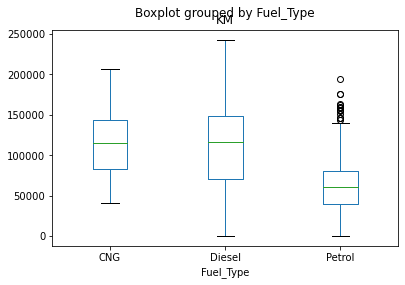

In [12]:
#2.2 box plots Create a box plot with the mileage by fuel type
import matplotlib.pyplot as plt
df.boxplot(by = 'Fuel_Type', column = 'KM', grid = False)

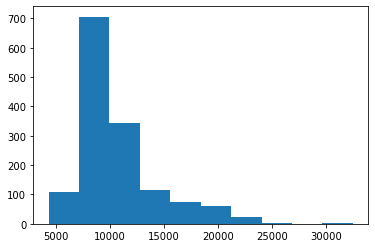

In [85]:
#2.3 histogram 
plt.hist(df['Price'])
plt.show()
# what is the distribution like? positive

In [29]:
#Problem3 Dataset: RidingMowers.csv
import pandas as pd
rm = pd.read_csv("/Users/hojin/Desktop/RidingMowers.csv")
rm.head()

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner


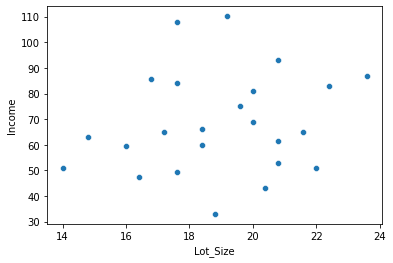

In [30]:
#3.a Using seaborn to create a scatter plot of Lot Size vs. Income
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data = rm, x = 'Lot_Size', y = 'Income')
plt.show()

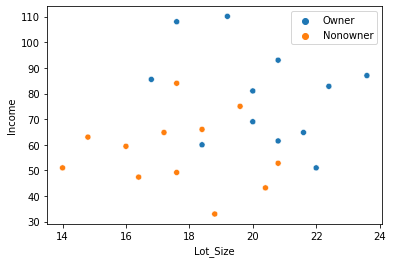

In [60]:
#3.b Color-code by the outcome variable owner/nonowner
# Make sure to obtain a well-formatted plot (create legible labels and a legend, etc.)
# Hint: use the hue parameter as the color encoding.

sns.scatterplot(x = 'Lot_Size', y = 'Income', data = rm, hue ='Ownership')
plt.legend()
plt.show()

In [114]:
#Problem4 Shipments of Household Appliances
import pandas as pd
shipments = pd.read_csv('/Users/hojin/Desktop/ApplianceShipments.csv')
shipments.head()

,Quarter,Shipments
0,Q1-1985,4009
1,Q2-1985,4321
2,Q3-1985,4224
3,Q4-1985,3944
4,Q1-1986,4123


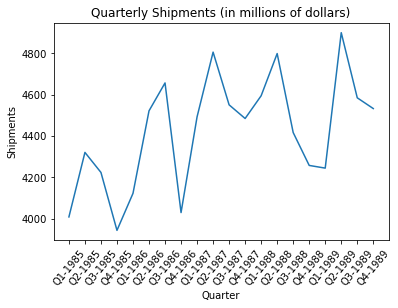

In [135]:
#4.1 Create a well-formatted time plot of the data using Python.
sns.lineplot(x="Quarter",y="Shipments", data = shipments)
plt.title("Quarterly Shipments (in millions of dollars)")
plt.xlabel("Quarter")
plt.ylabel("Shipments")
plt.xticks(rotation = 50)

plt.show()

In [76]:
# Problem 5. Import the data from the Covid Tracking project
import pandas as pd
data_url = 'http://covidtracking.com/api/states/daily.csv'
covid = pd.read_csv(data_url, parse_dates = ['date'])

In [77]:
#5.1. Which state has the highest numbered of recovered cases?
recovered = covid[['state','recovered']].dropna()
recovered.groupby('state')['recovered'].count().sort_values(ascending=False).head(3)

state
WY    340
AR    340
ME    340
Name: recovered, dtype: int64

In [78]:
#5.2. Which state has the most viral tests taken?
covid_set = covid[covid['totalTestResultsSource'] == 'totalTestsViral']
covid_set.groupby('state')['totalTestResultsSource'].count().sort_values(ascending=False).head(1)

state
MA    403
Name: totalTestResultsSource, dtype: int64